In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# importing sklearn libraries
from sklearn import svm
from sklearn.model_selection import train_test_split

In [10]:
forest_fires = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")
forest_fires.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
forest_fires.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [11]:
forest_fires.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [12]:
forest_fires.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [13]:
'''
If fire area > 0, set the value to 1 and change column name from area to label so that we can see it as a classification problem
'''
forest_fires['area'].values[forest_fires['area'].values > 0] = 1
forest_fires = forest_fires.rename(columns={'area': 'label'})

In [14]:
forest_fires.corr()
forest_fires.corr()['label'].sort_values(ascending=False)

label    1.000000
month    0.130329
DC       0.096724
temp     0.076047
FFMC     0.073823
DMC      0.062672
X        0.062491
Y        0.056892
wind     0.055702
ISI      0.035663
rain     0.025550
RH      -0.035587
day     -0.042970
Name: label, dtype: float64

In [15]:
'''
13 variables: X,Y(sptial coordinate)
			  month,day(time index)
			  FFMC,DMC,DC,ISI(model features)
			  temp,RH,wind,rain(natural features)
			  area(fire/no fire)
'''		
fire = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')

fire.month=fire.month.map({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})
fire.day=fire.day.map({'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6,'sun':7})
fire['ln(area+1)']=np.log(fire['area']+1) # logorithm transform
fire['FIRE'] = np.where(fire['ln(area+1)']>0, 'fire', 'no fire') # convert burned area to 'fire' and other area without fire to 'no fire'
'''
filter out the data regarding temperatures in summer months 
: type fire['summer_temp']: pandas.core.series.Series
: param fire['summer_temp']: temperatures in summer months
'''
fire['summer_temp']=np.where(fire['temp'],0,0) # set a copy 
a=fire.loc[fire['month']<10]
a=a.loc[a['month']>4] # filter the summer months 
fire['summer_temp']=a['temp'] # filter the temperatures in summer months
fire['summer_temp']=np.where(fire['summer_temp']>0,fire['summer_temp'],0) # set all 'NaN' to '0'

<Figure size 640x480 with 0 Axes>

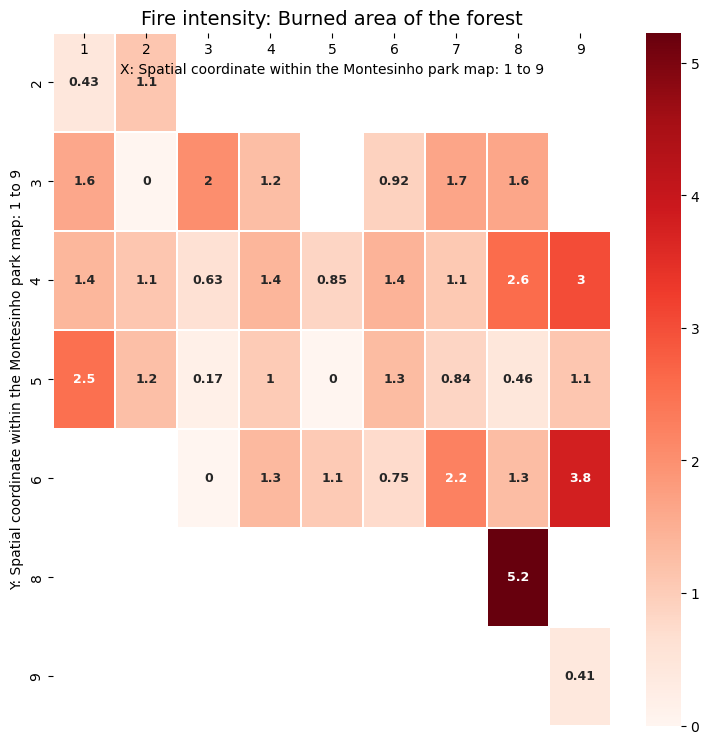

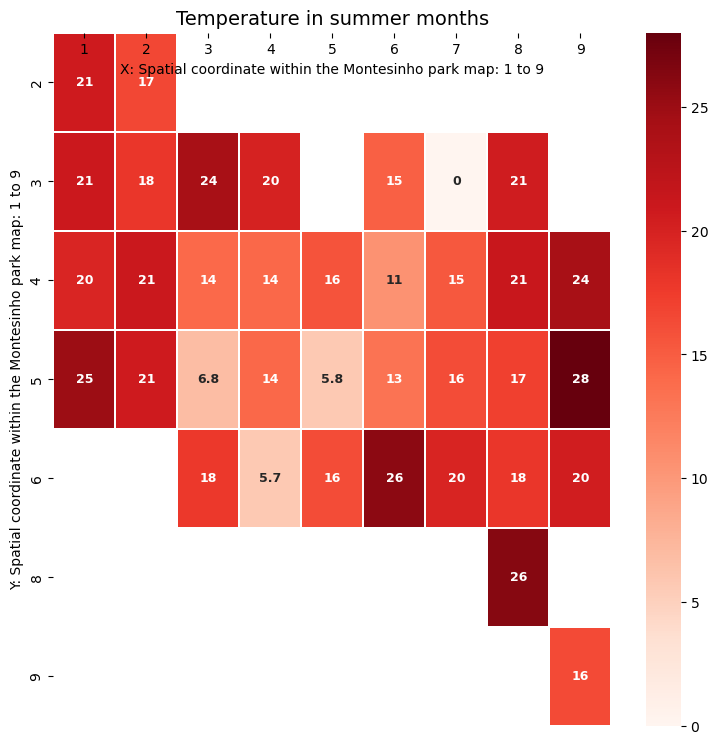

In [16]:
'''
: Function name: heatmap
: Function works to demonstrate the heatmap reagarding fire intensity or summer temperture distribution
  There are two kinds of heatmaps available: 
  		1) fire cases with spatial coordinates (coordinate=True)
  		2) summer temperatures with spatial coordinates (temperature=True)
: type figNo: int
: param figNo: number of figures plot
: type clr_background: str
: param clr_background: color palatte chosen for heatmaps, users can only set the color palattes available in Seaborn database
'''

def heatmap(coordinate=True,temperature=True,figNo=2,clr_background='Reds'):
	assert isinstance(figNo,int)
	assert figNo==coordinate+temperature # number of figures plots should match 
	df1=pd.DataFrame(fire,columns=['X','Y','ln(area+1)']) # set the dataframe for fire intensity 
	pt1=df1.pivot_table(index='Y', columns='X', values='ln(area+1)') #set the table and group the variables
	t1='Fire intensity: Burned area of the forest'

	df2=pd.DataFrame(fire,columns=['X','Y','summer_temp'])# set the dataframe for summer temperatures
	pt2=df2.pivot_table(index='Y', columns='X', values='summer_temp') #set the table and group the variables
	t2='Temperature in summer months'

	for i in range(figNo): 
		if coordinate==True and temperature==False:
			pt=[pt1] # set the pivot table
			t=[t1] # set the title 
		elif temperature==True and coordinate==False:
			pt=[pt2] # set the pivot table
			t=[t2] # set the title 
		else:
			pt=[pt1,pt2] # set the pivot table
			t=[t1,t2] # set the title 
		plt.figure(i)
		f,ax=plt.subplots(figsize = (9, 9)) # set figure size
		ax.spines['bottom'].set_position(('data', 0)) # set the position for axis
		ax.spines['left'].set_position(('data', 0))
		sns.heatmap(pt[i], cmap = clr_background, linewidths = 0.1,ax = ax,annot=True, annot_kws={'size':9,'weight':'bold'})
		# pt[i]: point to the pivot tables for different kinds of heatmaps
		#annot: annotate data values in the box of heat map
		plt.xlabel('X: Spatial coordinate within the Montesinho park map: 1 to 9',fontsize=10,position=(0.6,1.05))
		plt.ylabel('Y: Spatial coordinate within the Montesinho park map: 1 to 9',fontsize=10)
		plt.title(t[i],fontsize=14, position=(0.5,1.05)) # t[i]: point to the titles for different kinds of heatmaps
	plt.show() 
    
heatmap(coordinate=True,temperature=True,figNo=2,clr_background='Reds')

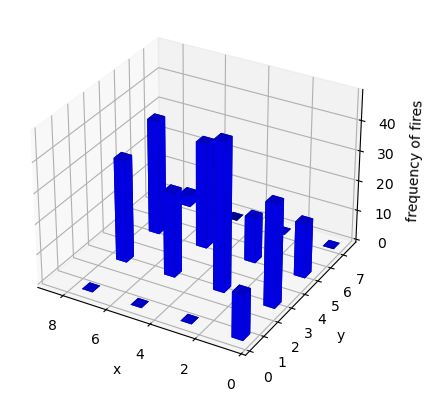

In [17]:
fire = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')
intensity=fire.area
X=fire.X
Y=fire.Y

def frequency_of_fires(intensity,X,Y):
    """
    For plotting the the frequency of fires in different grids of the park
    The areas with fire are filtered first and their frequency of recording a fire is plotted as a 3D plot. 
    Outliers are not included by default as only data with fires is considered.
    area column indicates the spread of the fire. Considered as intensity for all purposes.
    """

    assert isinstance(intensity, pd.core.series.Series)
    assert isinstance(X, pd.core.series.Series)
    assert isinstance(Y, pd.core.series.Series)
    assert intensity.all()>=0
    assert 0<X.all()<10
    assert 0<Y.all()<10

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x=X.iloc[intensity.to_numpy().nonzero()[0]]
    y=Y.iloc[intensity.to_numpy().nonzero()[0]]
    
    #chose fewer bins to make it look less crowded.
    hist, xedges, yedges = np.histogram2d(x,y,bins=4,range=[[0, 9], [0,9]])
    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0

    dx = dy = 0.5 * np.ones_like(zpos)
    dz = hist.ravel()
    #plt.ylim(9,0)
    plt.xlim(9,0)
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("frequency of fires")
    plt.show()
    
frequency_of_fires(intensity,X,Y)

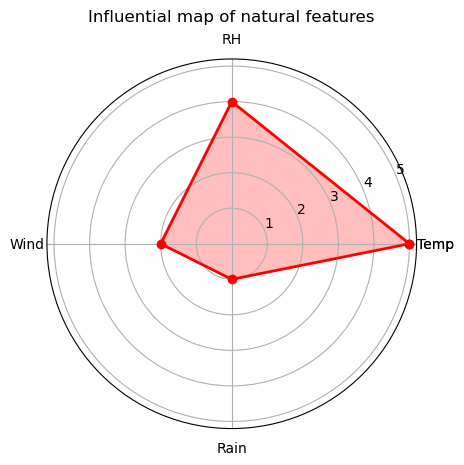

In [18]:
import numpy as np
import matplotlib.pyplot as plt

labels = np.array(['Temp','RH','Wind','Rain'])

dataLength = 4

data = np.array([5,4,2,1])

angles = np.linspace(0, 2*np.pi, dataLength, endpoint=False)
data = np.concatenate((data, [data[0]])) 
angles = np.concatenate((angles, [angles[0]]))
labels = np.append(labels, labels[0])
 
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, data, 'ro-', linewidth=2)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title('Influential map of natural features', va='bottom')
ax.fill(angles, data, facecolor='r', alpha=0.25)
ax.grid(True)
plt.show()

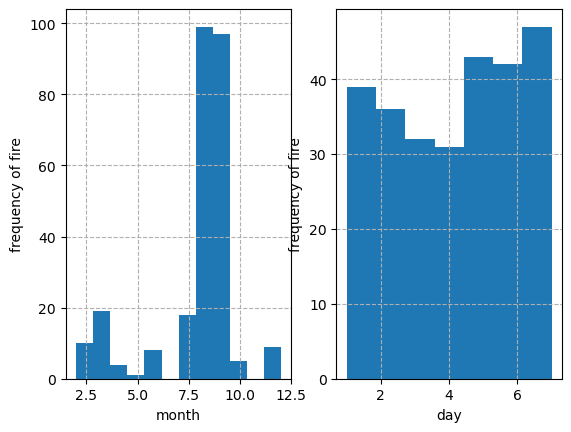

In [19]:
fire=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')
month=fire.month.map({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})
intensity=fire.area
day=fire.day.map({'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5, 'sat':6, 'sun':7})

def fires_and_month_day(intensity, month, day):
    '''
    Plots the frequency of observing fires in respective months and days
    '''
    assert isinstance(intensity, pd.core.series.Series)
    assert isinstance(month, pd.core.series.Series)
    assert isinstance(day, pd.core.series.Series)
    assert intensity.all()>=0
    assert 0<month.all()<13
    assert 0<day.all()<8
    month_num=month.iloc[intensity.to_numpy().nonzero()[0]]
    day_num=day.iloc[intensity.to_numpy().nonzero()[0]]
    fig, axs = plt.subplots(1, 2)
    axs[0].grid(linestyle = '--')
    axs[1].grid(linestyle = '--')
    axs[0].hist(month_num, bins=12)
    axs[1].hist(day_num.dropna(), bins=7)
    axs[0].set_xlabel('month')
    axs[0].set_ylabel('frequency of fire')
    axs[1].set_xlabel('day')
    axs[1].set_ylabel('frequency of fire')
    plt.show()

    
fires_and_month_day(intensity,month,day)

In [20]:
firecsv=np.genfromtxt('http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv', delimiter=',', skip_header=True)
data = firecsv.tolist()

In [21]:
def calcAccuracy(predict, y_test):
    '''
    Calculate the accuracy of prediction with test data
    predict: result of prediction
    '''
    count=0
    pool=len(predict)
    for i in range(pool):
        if predict[i]==y_test[i]:
            count=count+1
    accuracy=count/pool
    return accuracy

def performSVM(split, train, test_sample):
   '''
   Use SVC to classify
   split: the number of training data, the number of test data will be 517-split
   SVM: C value for SVM
   train: the type of data for training: natural-1 or model-0
   '''
   X_train=[]
   y_train=[]
   X_test=[]
   y_test=[]

   for i in range(1, split):
      if train==0:
          X_train.append(data[i][4:8])
      if train==1:
          X_train.append(data[i][8:12])
      y_train.append(data[i][12])

   for i in range(split-1):
      y_train[i]=float(y_train[i])
      if y_train[i]>0:
          y_train[i]=1
      else:
          y_train[i]=0

   if test_sample > 0:
       for i in range(test_sample, 517):#split
            if train==0:
                X_test.append(data[i][4:8])
            if train==1:
                X_test.append(data[i][8:12])
            y_test.append(data[i][12])
    
       for i in range(517-test_sample):#split
            y_test[i]=float(y_test[i])
            if y_test[i]>0:
                y_test[i]=1
            else:
                y_test[i]=0
   else:
       for i in range(split, 517):#split
            if train==0:
                X_test.append(data[i][4:8])
            if train==1:
                X_test.append(data[i][8:12])
            y_test.append(data[i][12])
    
       for i in range(517-split):#split
            y_test[i]=float(y_test[i])
            if y_test[i]>0:
                y_test[i]=1
            else:
                y_test[i]=0
        
   '''
   Three kinds of SVM methods
   '''    
   clf_linear=svm.SVC(kernel='linear').fit(X_train,y_train)
   clf_rbf=svm.SVC(kernel='rbf').fit(X_train,y_train)
   clf_sigmoid=svm.SVC(kernel='sigmoid').fit(X_train,y_train)

   predict_linear = clf_linear.predict(X_test)
   predict_rbf = clf_rbf.predict(X_test)
   predict_sigmoid= clf_sigmoid.predict(X_test)

   a = calcAccuracy(predict_linear, y_test)
   b = calcAccuracy(predict_rbf, y_test)
   c = calcAccuracy(predict_sigmoid, y_test)
   return a, b, c

def drawTrendSVM(a,b,SVM_C,Type,test_sample):
    '''
    a is the lower bounder of training samples
    a: int; 0=<a<b
    b is the upper bounder of training samples
    b: int; a<b<517
    SVM_C is the C value for SVM
    SVM_C: int
    Type is for applying natural features-1 or model features-0 
    Type: int; C=0 or 1
    test_sample is to control the number of test samples to be the same
    test_sample: int; test_sample >=0
    '''
    assert isinstance(a, int)
    assert a>=0
    assert isinstance(b, int)
    assert b>=a
    assert b<517
    assert isinstance(SVM_C, int)
    assert isinstance(Type, int)
    assert Type==0 or Type==1
    assert isinstance(test_sample, int)
    assert test_sample>=0
    
    if test_sample==0:
        print('After training, use the rest as test data')
    else:
        print('test samples are from %d to 517'%(test_sample))
    for i in range(a,b):
        a, b, c= performSVM(i, Type, test_sample)
        plt.scatter(i, a, c='g')
        plt.scatter(i, b, c='r') 
        plt.scatter(i, c, c='y')
        plt.legend('LRS') 

    plt.xlabel('Sample number')
    if Type==0:
        print('This SVM applied features in the model: FFMC, DMC, DC and ISI')
        plt.ylabel('Accuracy of model features')
    else:
        print('This SVM applied natural features: Temp, RH, Wind and Rain')
        plt.ylabel('Accuracy of natural features')
    plt.title('Accuracy related to the number of training data and SVM method', va='bottom')
    plt.show()

In [22]:
def givePrediction(X, Y, temp_value, RH_value):
    '''
    The most suitable SVM method sigmoid kernel is used
    All the data is used as training data
    Use only two dominant natural features, temp and RH to make prediction
    The temp is between 0 and 35
    The RH is between 0 and 100 
    '''
    assert isinstance(X, int)
    assert 1<=X<=9
    assert isinstance(Y, int)
    assert 2<=Y<=9
    assert isinstance(temp_value, int)
    assert temp_value<35 and temp_value>0
    assert isinstance(RH_value, int)
    assert RH_value<100 and RH_value>0
    
    X_train=[]
    y_train=[]
    # cols 0,1,8,9 are to be used
    #print the column headings for cols 0,1,8,9
    # print(data[0][0:2]+data[0][8:10])
    for i in range(517):
        X_train.append(data[i][0:2]+data[i][8:10])
        y_train.append(data[i][12])
    
    for i in range(517):
      y_train[i]=float(y_train[i])
      if y_train[i]>0:
          y_train[i]=1
      else:
          y_train[i]=0
          
    clf_sigmoid=svm.SVC(kernel='sigmoid').fit(X_train,y_train)
    predict_rbf = clf_sigmoid.predict([[X,Y,temp_value,RH_value]])
    if predict_rbf == 1:
        print('High probability of forest fire in this area for temp=%d and RH=%d.'%(temp_value, RH_value))
    if predict_rbf == 0:
        print('Low probability of forest fire in this area for temp=%d and RH=%d.'%(temp_value, RH_value))

After training, use the rest as test data
This SVM applied natural features: Temp, RH, Wind and Rain


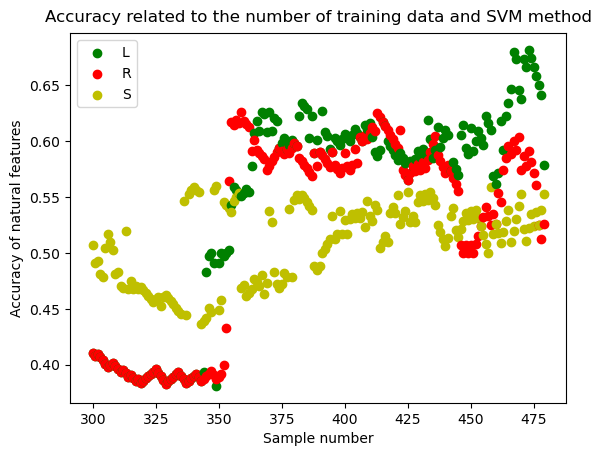

In [23]:
'''
Example function: 
This function will draw the trend of accuracy
The number of training data from 300 to 480
The C value for SVM is selected to be 1
Natural features will be used
After training, the rest of data will be used as test data
'''
drawTrendSVM(300,480,1,1,0)

After training, use the rest as test data
This SVM applied features in the model: FFMC, DMC, DC and ISI


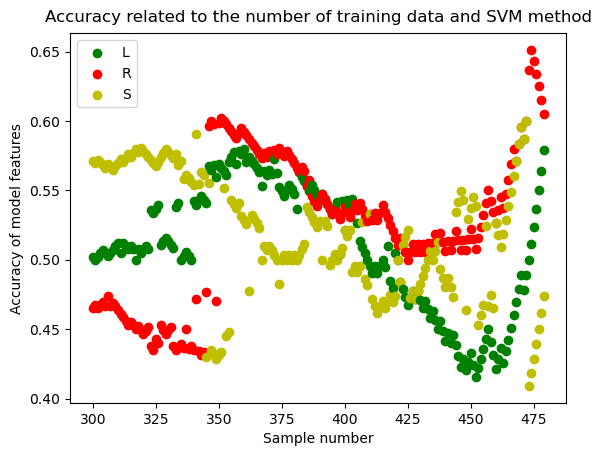

In [24]:
'''
Other features are used to draw the trend
'''
drawTrendSVM(300,480,1,0,0)

In [25]:
givePrediction(7,7,30,10)
givePrediction(2,3,30,10)
givePrediction(1,4,30,10)
givePrediction(5,4,30,10)
givePrediction(6,4,22,40) 
givePrediction(8,4,22,40)
givePrediction(9,6,22,40)
givePrediction(6,5,33,26)

Low probability of forest fire in this area for temp=30 and RH=10.
Low probability of forest fire in this area for temp=30 and RH=10.
Low probability of forest fire in this area for temp=30 and RH=10.
Low probability of forest fire in this area for temp=30 and RH=10.
High probability of forest fire in this area for temp=22 and RH=40.
High probability of forest fire in this area for temp=22 and RH=40.
Low probability of forest fire in this area for temp=22 and RH=40.
High probability of forest fire in this area for temp=33 and RH=26.


In [26]:
# Compare Algorithms
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# load dataset
X = forest_fires.drop('label', axis=1)
y = forest_fires['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=101)

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=5000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('MLP', MLPClassifier()))
models.append(('GradientBoost',GradientBoostingClassifier()))
models.append(('AdaBoost',AdaBoostClassifier()))
models.append(('Bagging',BaggingClassifier()))
models.append(('RandomForest',RandomForestClassifier()))
models.append(('ExtraTrees',ExtraTreesClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=100)
    cv_results = model_selection.cross_val_score(model, X, y,   cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.501667 (0.235673)
KNN: 0.540667 (0.239703)
CART: 0.528333 (0.229946)
NB: 0.505333 (0.296038)
SVM: 0.570000 (0.287769)
MLP: 0.497333 (0.291764)
GradientBoost: 0.523667 (0.257350)
AdaBoost: 0.543000 (0.218545)
Bagging: 0.524333 (0.239715)
RandomForest: 0.514000 (0.241853)
ExtraTrees: 0.530667 (0.242243)
